<a href="https://colab.research.google.com/github/rishika-p/-NNDL-/blob/main/Assignment_10.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import math
import pandas as pd
import numpy as np
import random
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.preprocessing import minmax_scale
from sklearn.model_selection import train_test_split
from random import shuffle
from scipy import stats

In [ ]:
data = pd.read_excel("/content/Load Data in kW.xlsx")
data.describe()

,5551.82208
count,2183.000000
mean,6393.616060
std,17143.020064
min,3377.919600
25%,5257.520640
50%,5935.910400
75%,6738.692400
max,805444.430400


In [10]:
import numpy as np
import seaborn as sns
import math
import random
import matplotlib.pyplot as plt
from random import shuffle
from sklearn.preprocessing import minmax_scale
from sklearn.model_selection import train_test_split
import pandas as pd
from scipy import stats

In [5]:
data = pd.read_excel("/content/Load Data in kW.xlsx")
data.describe()

,5551.82208
count,2183.000000
mean,6393.616060
std,17143.020064
min,3377.919600
25%,5257.520640
50%,5935.910400
75%,6738.692400
max,805444.430400


In [6]:
data.describe()

,5551.82208
count,2183.000000
mean,6393.616060
std,17143.020064
min,3377.919600
25%,5257.520640
50%,5935.910400
75%,6738.692400
max,805444.430400


In [7]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2183 entries, 0 to 2182
Data columns (total 1 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   5551.82208  2183 non-null   float64
dtypes: float64(1)
memory usage: 17.2 KB


/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


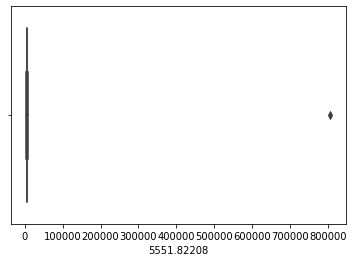

In [9]:
sns.boxplot(load_data.iloc[:,0])

In [11]:
z = np.abs(stats.zscore(load_data.iloc[:,0]))
print(np.where(z > 3))

(array([928]),)


/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


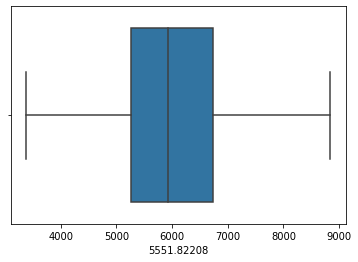

In [12]:
load_data.iloc[928,0] = load_data.iloc[927,0]
sns.boxplot(load_data.iloc[:,0])

In [20]:
x = minmax_scale(x)
y = minmax_scale(y)
data_n = []
for i in range(len(x)):
  data_n.append((x[i],y[i]))
print(len(data_n))
train_data_n,test_data_n = train_test_split(data_n,test_size=0.1)
len(train_data_n)

2159


1943

In [24]:
m = 1
c = 1
learning_rate = 0.01
epochs = 10
batch_size = 200
v_m = 0
v_c = 0
momentum_coefficient = 0.8
def gradient_of_m(d,m,c):
  sum = 0
  for i in range(len(d)):
    sum = sum + (d[i][1]-m*d[i][0]-c)*d[i][0]
  return -1*sum/len(d)
def error(d,m,c):
  sum = 0
  for i in range(len(d)):
    sum = sum + math.pow(d[i][1]-m*d[i][0]-c,2)
  return 0.5*sum/len(d)

def gradient_of_c(d,m,c):
  sum = 0
  for i in range(len(d)):
    sum = sum + (d[i][1]-m*d[i][0]-c)
  return -1*sum/len(d)

In [30]:
error_list = []
number_of_batches = (len(train_data_n)//batch_size)
for i in range(epochs):
  for j in range(number_of_batches+1):
    if j == number_of_batches:
      d = train_data_n[j*batch_size:]
    else:
      d = train_data_n[j*batch_size:(j+1)*batch_size]
    delta_m = -1*learning_rate*gradient_of_m(d,m,c)
    delta_c = -1*learning_rate*gradient_of_c(d,m,c)
    v_m = v_m*momentum_coefficient + delta_m
    v_c = v_c*momentum_coefficient + delta_c
    m = m + v_m
    c = c + v_c
    print(" error {}".format(error(d,m,c)))
    error_list.append(error(d,m,c))
  random.shuffle(train_data_n)
  

 error 0.008399685605219566
 error 0.00913461154877434
 error 0.007617116781271607
 error 0.008159194848323021
 error 0.009344590874120307
 error 0.00886313162107647
 error 0.01037394229550539
 error 0.010081916868355592
 error 0.008983717003796137
 error 0.006095387530404288
 error 0.007195251810121976
 error 0.008760749854088437
 error 0.009296625653225421
 error 0.007027142048331045
 error 0.009817393876481955
 error 0.009632067811611024
 error 0.010569590302444502
 error 0.008189831229067258
 error 0.008530328760924081
 error 0.008729646017086305
 error 0.009863166366497667
 error 0.00795771279319018
 error 0.0073154485243409765
 error 0.008552817827172361
 error 0.009864338805734951
 error 0.008614300528205271
 error 0.011226146060235533
 error 0.008051639500645264
 error 0.00787216187719304
 error 0.008268033263912802
 error 0.00838058062690662
 error 0.010203814540687618
 error 0.008865254371507382
 error 0.008594249445217235
 error 0.006977562071740928
 error 0.0092075115027998

In [31]:
print(m,c)

0.6658759317099038 0.16184103367839178


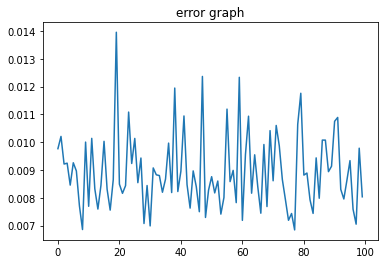

In [27]:
plt.title("error graph")
x_1 = range(len(error_list))
y_1 = error_list
plt.plot(x_1,y_1)

In [28]:
print("train error :",error(train_data_n,m,c))
print("test error :",error(test_data_n,m,c))

train error : 0.008850999088102704
test error : 0.008403157552452625


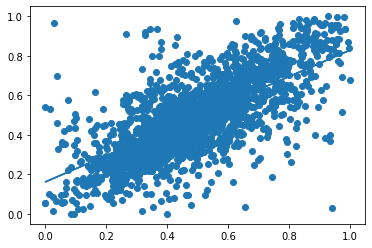

In [34]:
plt.scatter(x,y)
x1 = x
y1 = [i*m+c for i in x1]
plt.plot(x1,y1)

In [35]:
input_load = float(input("enter yesterday load : "))
maximum_value = 8841.669480
minimum_value = 3377.919600
input_load = (input_load - minimum_value)/(maximum_value-minimum_value)
output_load = input_load*m+c
output_load = output_load*(maximum_value-minimum_value)+minimum_value
print("predicted load is : ",output_load)

enter yesterday load : 5555.5
predicted load is :  5712.176906062614
